In [1]:
import healsparse as hsp
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [2]:
filename_r = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_g_maglim_psf_wmean.hs"
filename_i = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_z_maglim_psf_wmean.hs"
#filename = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_i_nexp_sum.hs"
#filename = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_i_exptime_sum.hs"
#filename = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_r_maglim_aper_wmean.hs"

In [3]:
mask_r = hsp.HealSparseMap.read(filename_r)
mask_i = hsp.HealSparseMap.read(filename_i)

In [4]:
ra_b, dec_b = np.linspace(60.1,60.45,1000), np.linspace(-36.40,-36.10,1000)
ra_v,dec_v = np.meshgrid(ra_b, dec_b)
vpix_r = mask_r.get_values_pos(ra_v,dec_v, lonlat=True)
vpix_i = mask_i.get_values_pos(ra_v,dec_v, lonlat=True)

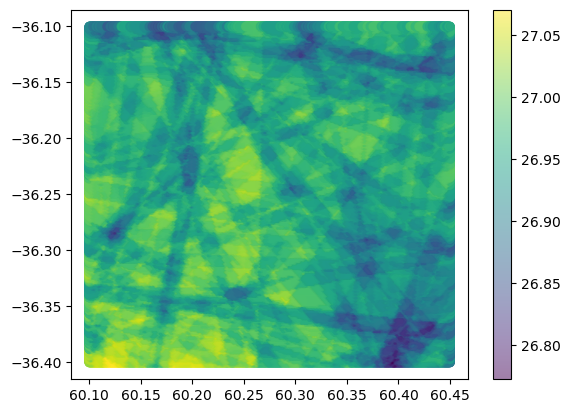

In [5]:
plt.scatter(ra_v, dec_v, c=vpix_r, alpha = .5)
plt.scatter(ra_v, dec_v, c=vpix_r, alpha = .5)
plt.colorbar()
#plt.xlim([60.45,60.10])
#plt.ylim([-36.40,-36.10])
plt.show()

In [6]:
gal = Table.read("/sps/lsst/users/namourou/web/desc/clusters/DC2_mask/galaxies.fits")

In [7]:
ra_min, ra_max = min(gal['ra']), max(gal['ra'])
dec_min, dec_max = min(gal['dec']), max(gal['dec'])
#ra_min, ra_max = 60,60.5
#dec_min, dec_max = -36.4, -36

# Définir la taille des carrés (en degrés)
cote_carré = 0.01  # Vous pouvez ajuster cette valeur

# Créer une grille de carrés
ra_bins = np.arange(ra_min, ra_max, cote_carré)
dec_bins = np.arange(dec_min, dec_max, cote_carré)

# Créer des tableaux pour stocker les densités de galaxies
dens = np.histogram2d(gal['ra'], gal['dec'], bins = (ra_bins,dec_bins))[0]

In [8]:
ra_pt = []
for i in range(len(ra_bins)-1):
    ra_pt.append((ra_bins[i]+ra_bins[i+1])/2) 
dec_pt = []
for i in range(len(dec_bins)-1):
    dec_pt.append((dec_bins[i]+dec_bins[i+1])/2) 

In [9]:
ra_pt_grid, dec_pt_grid = np.meshgrid(ra_pt, dec_pt)

In [10]:
mu = np.mean(dens)
sigma = np.std(dens)
print(mu,sigma)
indices_inférieurs_à_la_moyenne = np.where(dens.T < mu-3*sigma)
# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask = ra_pt_grid[indices_inférieurs_à_la_moyenne]
dec_mask = dec_pt_grid[indices_inférieurs_à_la_moyenne]

20.164092664092664 5.078675311285442


In [11]:
gal = gal[(gal["ra"]<=60.45)*(gal["ra"]>=60.1)*(gal["dec"]<=-36.1)*(gal["dec"]>=-36.35)]

(-36.35, -36.1)

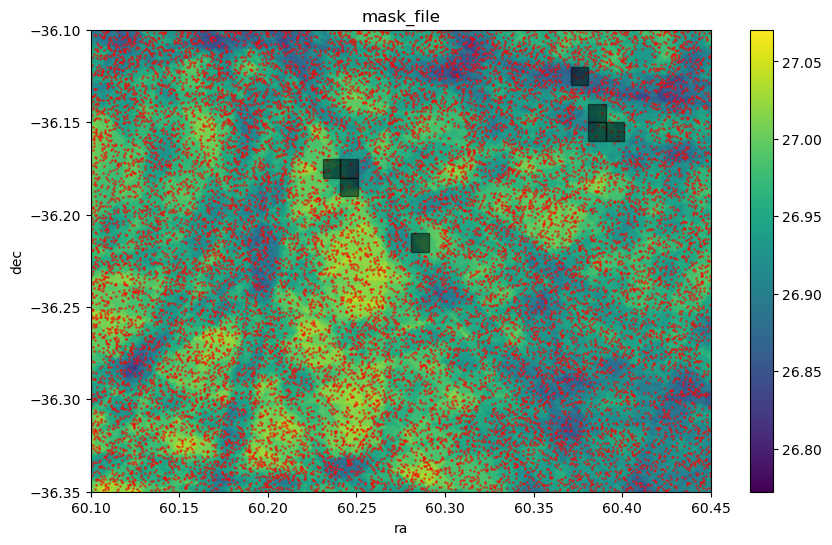

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize = 2500, vmin=24.9, vmax=25.1)
plt.scatter(ra_v, dec_v, c=vpix_r)#, vmin=24.9, vmax=25.1)
plt.colorbar()
plt.scatter(gal['ra'],gal['dec'], s=1, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('mask_file')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .5)
    ax.add_patch(rectangle)
plt.xlim([60.1,60.45])
plt.ylim([-36.35,-36.10])
#plt.legend()


(-36.35, -36.1)

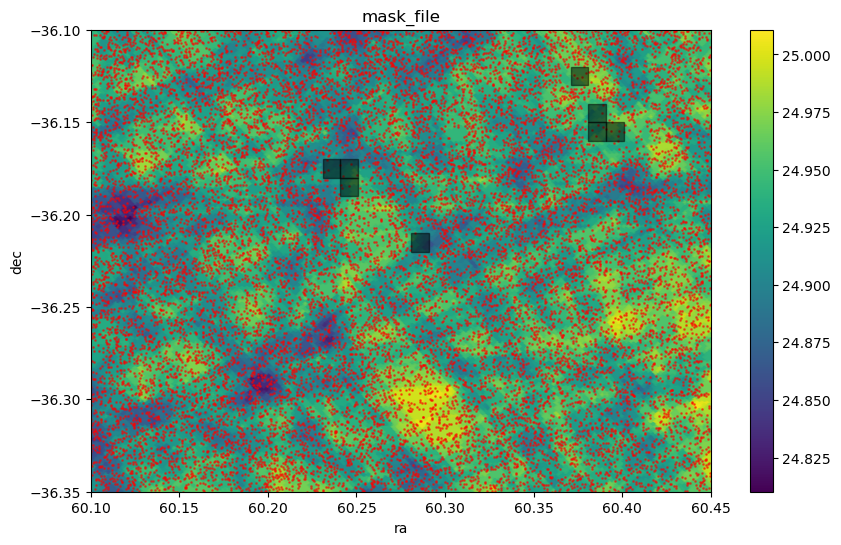

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize = 2500, vmin=24.9, vmax=25.1)
plt.scatter(ra_v, dec_v, c=vpix_i)#, vmin=24.9, vmax=25.1)
plt.colorbar()
plt.scatter(gal['ra'],gal['dec'], s=1, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('mask_file')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .5)
    ax.add_patch(rectangle)
plt.xlim([60.1,60.45])
plt.ylim([-36.35,-36.10])
#plt.legend()
